# Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

from sklearn.manifold import TSNE

In [3]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9d49551c182f0d81445e14b5c8e5a52bff5389e6dda886acbf20197b044d29d3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [4]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Carga de datos

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del train balanceado
url = '/content/drive/MyDrive/csv/train_balanceado.csv'

try:
    df_train_balanceado = pd.read_csv(url)
    print("Archivo cargado corecto de train balanceado")
except Exception as e:
    print(f"Error al cargar el archivo CSV de train balanceado: {e}")

Archivo cargado corecto de train balanceado


In [7]:
# Muestra las primeras filas del DataFrame
df_train_balanceado.head().T

0           1                      2  \
category                        home    misc_net          entertainment   
amt                             15.0      109.96                  10.43   
city                        Moriarty     Burbank                 Eugene   
state                     New Mexico  Washington                 Oregon   
lat                          34.9889     46.1966                44.0385   
long                       -106.0609   -118.9017              -123.0614   
city_pop                        7268        3684                 191096   
merch_lat                  35.191886   45.563869              44.708545   
merch_long               -105.832554 -118.076592            -122.072096   
age                               31          39                     55   
transaction_hour                  12           2                      3   
transaction_day_of_month          14          30                     15   
transaction_month                  1          12                      1   
transaction_year                2019        2020                   2019   
transaction_day_of_week            0           2                      1   
profession_group               Salud        Arte  Ingeniería y Técnicos   
fraud_category_merchant            2           2                      2   
is_fraud                           0           0                      0   

                                     3            4  
category                  shopping_pos  grocery_net  
amt                               5.71         39.7  
city                           Redford       Arnold  
state                         Missouri     Missouri  
lat                            37.3272      38.4305  
long                          -91.0243      -90.387  
city_pop                           241        35439  
merch_lat                     36.85701    38.952935  
merch_long                  -91.002408   -90.990324  
age                                 46           35  
transaction_hour                    19            5  
transaction_day_of_month            27           27  
transaction_month                   12           12  
transaction_year                  2020         2020  
transaction_day_of_week              6            6  
profession_group                 Other        Other  
fraud_category_merchant              0            4  
is_fraud                             0            0

In [8]:
# 'URL_DEL_ARCHIVO_CSV' del archivo CSV del test
url = '/content/drive/MyDrive/csv/test.csv'

try:
    df_test = pd.read_csv(url)
    print("Archivo cargado corecto de test")
except Exception as e:
    print(f"Error al cargar el archivo CSV de test: {e}")

Archivo cargado corecto de test


In [9]:
# Muestra las primeras filas del DataFrame
df_test.head().T

0            1                   2  \
category                       home  grocery_net        shopping_net   
amt                           30.02        48.31               80.94   
city                         Arnold       Dumont  Blairsden-Graeagle   
state                      Missouri     Colorado          California   
lat                         38.4305      39.7532             39.8127   
long                        -90.387    -105.6356           -120.6405   
city_pop                      35439          565                1725   
merch_lat                 39.256111    40.504011           39.595713   
merch_long               -91.262386  -106.561224          -120.16454   
age                              35           41                  53   
transaction_hour                 19            5                   4   
transaction_day_of_month         29            1                  29   
transaction_month                12            1                  12   
transaction_year               2020         2019                2020   
transaction_day_of_week           1            1                   1   
profession_group              Other        Salud          Ejecutivos   
fraud_category_merchant           3            0                   5   
is_fraud                          0            0                   0   

                                      3           4  
category                         travel    misc_pos  
amt                                5.28        68.7  
city                      Cascade Locks    Sun City  
state                            Oregon  California  
lat                              45.671     33.7467  
long                          -121.8686   -117.1721  
city_pop                           1288       54287  
merch_lat                     46.504832   33.932468  
merch_long                   -121.68543 -116.294259  
age                                  83          47  
transaction_hour                     20          11  
transaction_day_of_month             20           1  
transaction_month                     1           1  
transaction_year                   2019        2019  
transaction_day_of_week               6           1  
profession_group                  Other        Arte  
fraud_category_merchant               0           5  
is_fraud                              0           0

In [10]:
# Columnas de df_train_balanceado
df_train_balanceado.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

In [11]:
# Columnas de df_test
df_test.columns

Index(['category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year',
       'transaction_day_of_week', 'profession_group',
       'fraud_category_merchant', 'is_fraud'],
      dtype='object')

# EDA

In [12]:
# Muestra información del DataFrame df_train_balanceado
df_train_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  20160 non-null  object 
 1   amt                       20160 non-null  float64
 2   city                      20160 non-null  object 
 3   state                     20160 non-null  object 
 4   lat                       20160 non-null  float64
 5   long                      20160 non-null  float64
 6   city_pop                  20160 non-null  int64  
 7   merch_lat                 20160 non-null  float64
 8   merch_long                20160 non-null  float64
 9   age                       20160 non-null  int64  
 10  transaction_hour          20160 non-null  int64  
 11  transaction_day_of_month  20160 non-null  int64  
 12  transaction_month         20160 non-null  int64  
 13  transaction_year          20160 non-null  int64  
 14  transa

# Preprocesamiento

Separando los datos en X_train, y_train, X_test, y_test

In [13]:
# X_train todas las columnas de df_train_balanceado menos 'is_fraud'
X_train = df_train_balanceado.drop('is_fraud', axis=1)

In [14]:
# y_train solo columna 'is_fraud' de df_train_balanceado
y_train =  df_train_balanceado['is_fraud']

In [15]:
# X_test todas las columnas de df_test menos 'is_fraud'
X_test = df_test.drop('is_fraud', axis=1)

In [16]:
# y_test solo columna 'is_fraud' de df_test
y_test =  df_test['is_fraud']

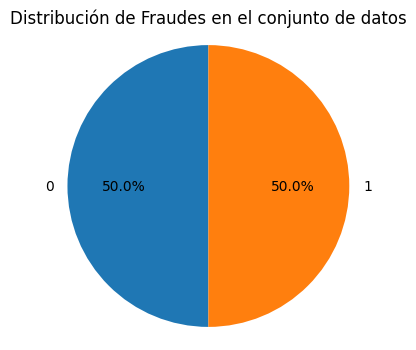

In [17]:
# Verifica si la columna 'is_fraud' existe en el DataFrame
if 'is_fraud' in df_train_balanceado.columns:
    # Cuenta la cantidad de cada valor en la columna 'is_fraud'
    conteo_fraude = df_train_balanceado['is_fraud'].value_counts()

    # Crea el gráfico de pastel
    plt.figure(figsize=(4, 4))
    plt.pie(conteo_fraude, labels=conteo_fraude.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de Fraudes en el conjunto de datos')
    plt.axis('equal')  # Asegura que el gráfico sea un círculo
    plt.show()
else:
    print("La columna 'is_fraud' no se encuentra en el DataFrame.")

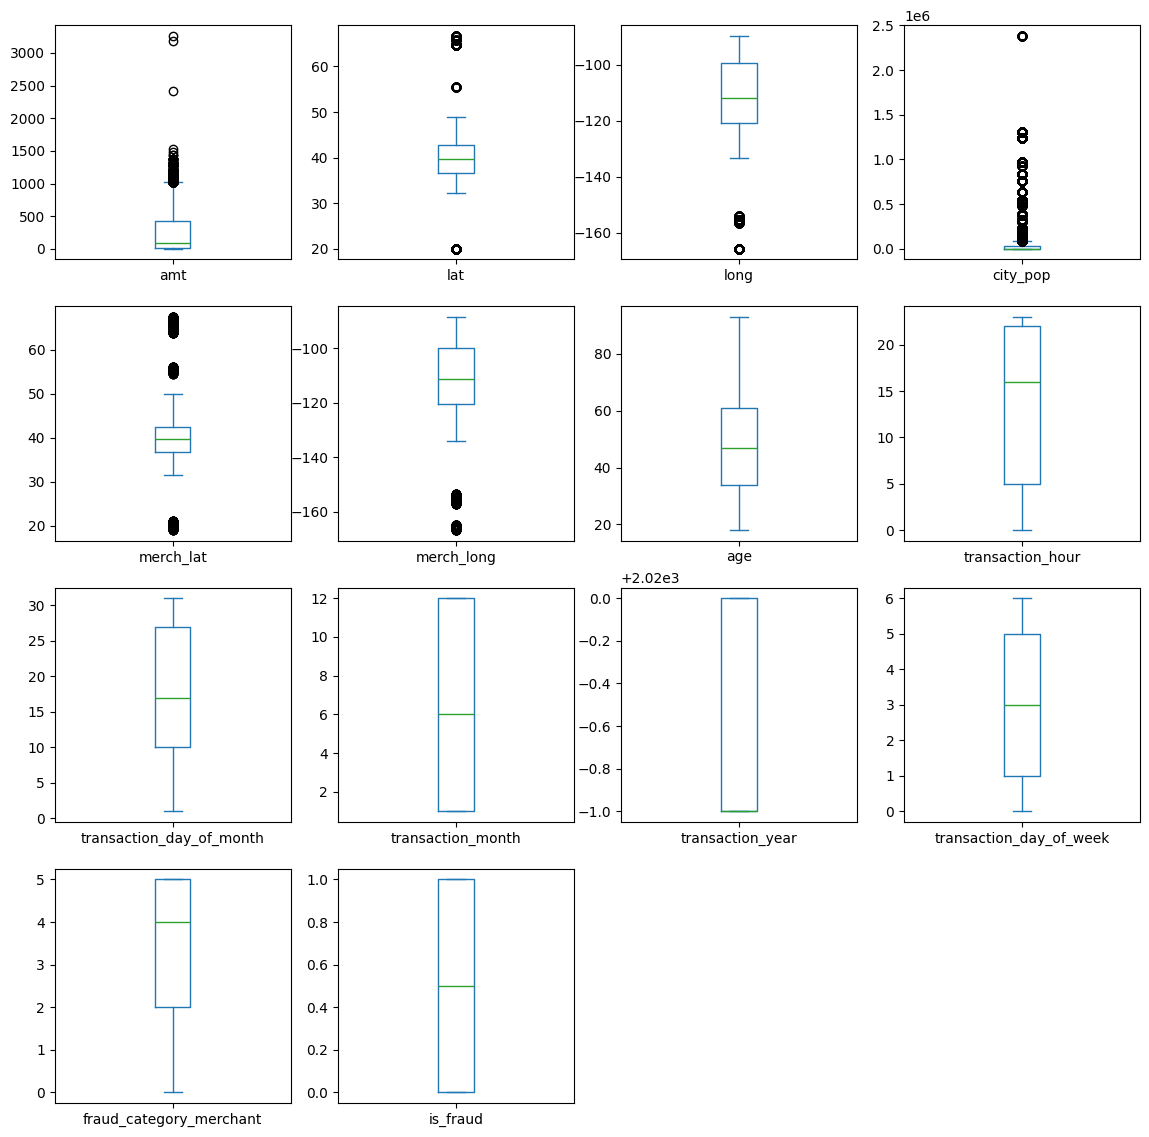

In [18]:
# Diagrana boxplot para visualizar los Outliers
df_train_balanceado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

In [19]:
# ----- Función para rastreo del mejor percentil superior para ajuste de outliers superiores
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup, dataframeA):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(dataframeA.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual

# Proceso de corrección de Outlier Superior en train
columnas =  [1, 4, 6, 7]
for col in columnas:
  q3=np.quantile(df_train_balanceado.iloc[ : , col] , 0.75)
  q1=np.quantile(df_train_balanceado.iloc[ : , col] , 0.25)
  IQR=q3-q1
  CotaSup=q3+1.5*IQR
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_train_balanceado)
  df_train_balanceado.iloc[ : , col] = np.where(df_train_balanceado.iloc[ : , col] > ValorTecho, ValorTecho, df_train_balanceado.iloc[ : , col] )

Percentil 99 = 1145.9,col = 1, CotaSup = 1017.84375
Percentil 98 = 1113.2,col = 1, CotaSup = 1017.84375
Percentil 97 = 1076.3,col = 1, CotaSup = 1017.84375
Percentil 96 = 1051.8,col = 1, CotaSup = 1017.84375
Percentil 95 = 1029.2,col = 1, CotaSup = 1017.84375
Percentil 94 = 1005.3,col = 1, CotaSup = 1017.84375
Percentil 99 = 64.7556,col = 4, CotaSup = 51.75189999999999
Percentil 98 = 48.8878,col = 4, CotaSup = 51.75189999999999
Percentil 99 = 1312922.0,col = 6, CotaSup = 87834.0
Percentil 98 = 1241364.0,col = 6, CotaSup = 87834.0
Percentil 97 = 973849.0,col = 6, CotaSup = 87834.0
Percentil 96 = 927396.0,col = 6, CotaSup = 87834.0
Percentil 95 = 757530.0,col = 6, CotaSup = 87834.0
Percentil 94 = 641349.0,col = 6, CotaSup = 87834.0
Percentil 93 = 545147.0,col = 6, CotaSup = 87834.0
Percentil 92 = 518429.0,col = 6, CotaSup = 87834.0
Percentil 91 = 389246.0,col = 6, CotaSup = 87834.0
Percentil 90 = 320420.0,col = 6, CotaSup = 87834.0
Percentil 89 = 233717.0,col = 6, CotaSup = 87834.0
Perce

<ipython-input-19-b88128b5f4b9>:16: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, df_train_balanceado)


In [20]:
# ----- Función creada para rastreo del mejor percentil inferior para ajuste de outliers inferiores
def HallaMejorPercentilInf(micol,  minimo, maximo, miCotaInf, dataframe):
	valor_tope_previo = 0
	valor_x_previo = 0
	for x in range(minimo, maximo, +1):
		valor_tope_actual = np.quantile(dataframe.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaInf = {miCotaInf}")
		if(valor_tope_actual >= miCotaInf):
			return x, valor_tope_actual

# Proceso de corrección de Outlier Inferior en train
columnas =  [4, 5, 7, 8]
for col in columnas:
  q3=np.quantile(df_train_balanceado.iloc[:,col] , 0.75)
  q1=np.quantile(df_train_balanceado.iloc[:,col] , 0.25)
  IQR=q3-q1
  CotaInf=q1-1.5*IQR
  PercentilInfSugerido , ValorPiso = HallaMejorPercentilInf(col, 1, 20, CotaInf, df_train_balanceado)
  df_train_balanceado.iloc[:, col] = np.where(df_train_balanceado.iloc[:, col] < ValorPiso, ValorPiso, df_train_balanceado.iloc[:, col] )

Percentil 1 = 20.0827,col = 4, CotaInf = 27.69350000000001
Percentil 2 = 32.9396,col = 4, CotaInf = 27.69350000000001
Percentil 1 = -156.292,col = 5, CotaInf = -152.58565000000002
Percentil 2 = -155.3697,col = 5, CotaInf = -152.58565000000002
Percentil 3 = -133.1171,col = 5, CotaInf = -152.58565000000002
Percentil 1 = 20.9154896,col = 7, CotaInf = 28.516483874999995
Percentil 2 = 32.5269501,col = 7, CotaInf = 28.516483874999995
Percentil 1 = -156.529734,col = 8, CotaInf = -151.228452
Percentil 2 = -155.13979434,col = 8, CotaInf = -151.228452
Percentil 3 = -132.392044,col = 8, CotaInf = -151.228452


<ipython-input-20-602fa0814d1d>:18: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  PercentilInfSugerido , ValorPiso = HallaMejorPercentilInf(col, 1, 20, CotaInf, df_train_balanceado)


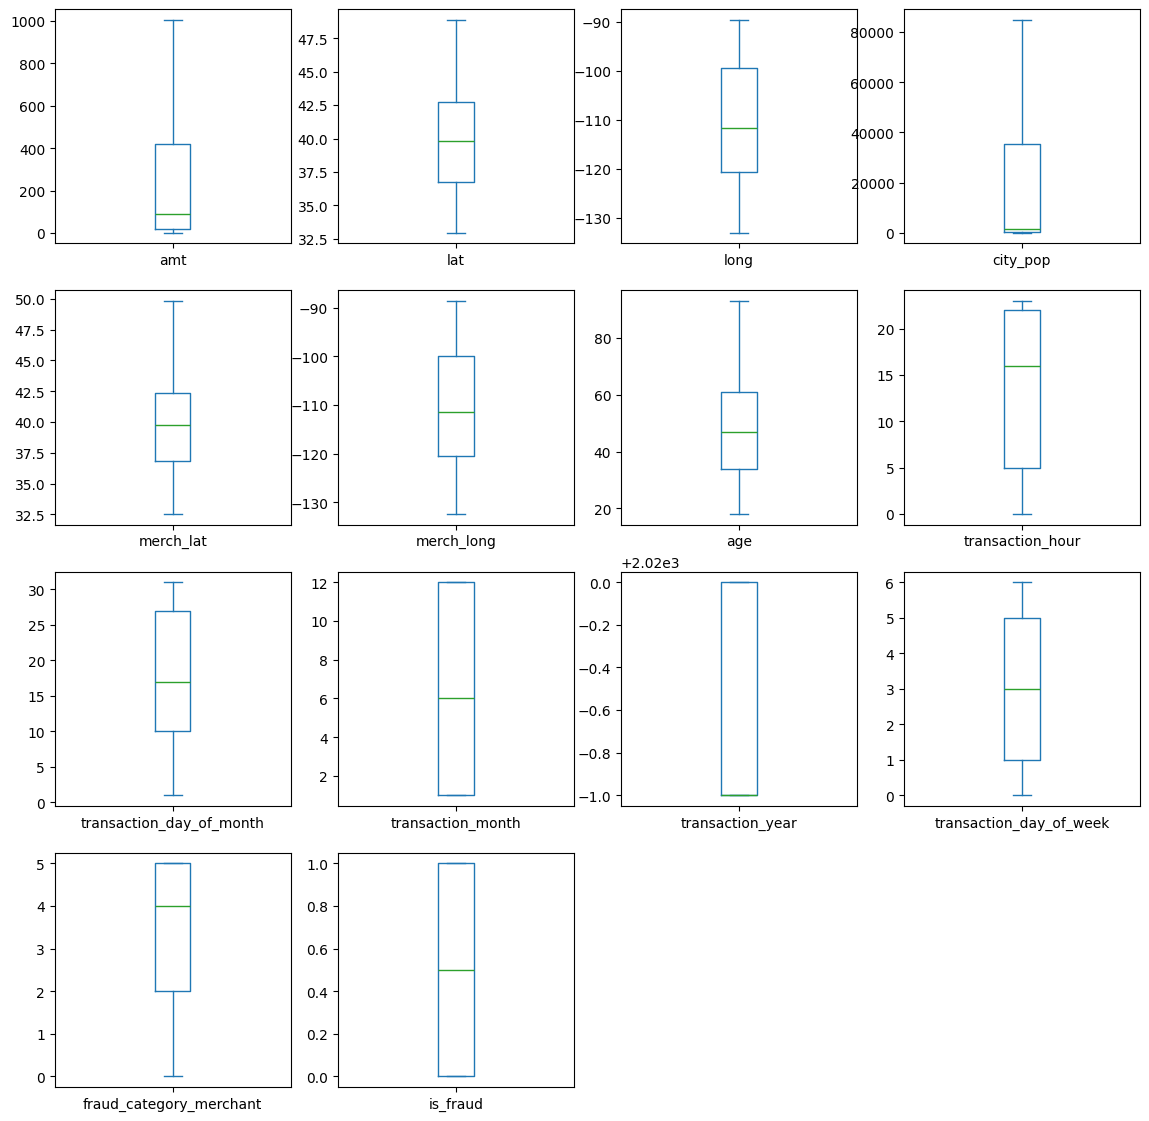

In [21]:
# Diagrana boxplot para verificar que no hay Outliers
df_train_balanceado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(14, 14))
plt.show()

Se obtiene los nuevos valores de train sin valores Outliers

In [22]:
# X_train todas las columnas de df_train_balanceado menos 'is_fraud'
X_train_sin_atipico = df_train_balanceado.drop('is_fraud', axis=1)

In [23]:
# y_train solo columna 'is_fraud' de df_train_balanceado
y_train_sin_atipico =  df_train_balanceado['is_fraud']

**Los datos están listos en:**

X_train: datos train con atípicos

y_train: datos train con atípicos

X_train_sin_atipico: datos train sin atípicos

y_train_sin_atipico: datos train sin atípicos

X_test: datos de test

y_test: datos de test


**Nota 1:**

Usar los train de acuerdo al algoritmo si soporta o no datos atípicos en el train, en relación al test no se ha manejado ni balanceo ni eliminación de atípicos.

Solo faltaría que utilicen StandarScaler a las X tanto de X_train como X_test antes del entrenamiento.

Pero NO escalar a los algoritmos que no son necesarios escalar las variables como árbol de decisión y random forest.



**Nota 2:**

**Ahora están todas las variables en el train y en el test:**

'category', 'amt', 'city', 'state', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_month', 'transaction_year', 'transaction_day_of_week', 'profession_group', 'fraud_category_merchant', 'is_fraud'

**En la red MLP se utilizó:**

'category', 'amt', 'city_pop', 'age', 'transaction_hour', 'transaction_day_month', 'transaction_month', 'profession_group', 'fraud_category_merchant', 'is_fraud'

**Entradas consensuadas:**

'category', 'amt', 'city', 'state',
       'age', 'transaction_hour',
       'transaction_day_of_month', 'transaction_day_of_week',
       'profession_group', 'fraud_category_merchant'
       
**Salida:**
      'is_fraud'

**Conclusiones antes del modelamiento**

1. Deben eliminar del Xtrain, Xtest las variables que no consideren antes del entrenamiento.

2. Usar el escalador StandarScaler si lo necesita el algoritmo

3. Usar labelencoder y/o onethotencoder a las variables 'category', 'profession_group', 'city', 'state'

4. La variable 'fraud_category_merchant' ya tiene su peso 0:no fraude, 1:muy bajo fraude, 2:bajo fraude, 3:intemedio fraude, 4:alto fraude, 5:muy alto fraude, además es ya de tipo entero por lo que no necesita ser codificada
       

# Selección de Variables y Codificación

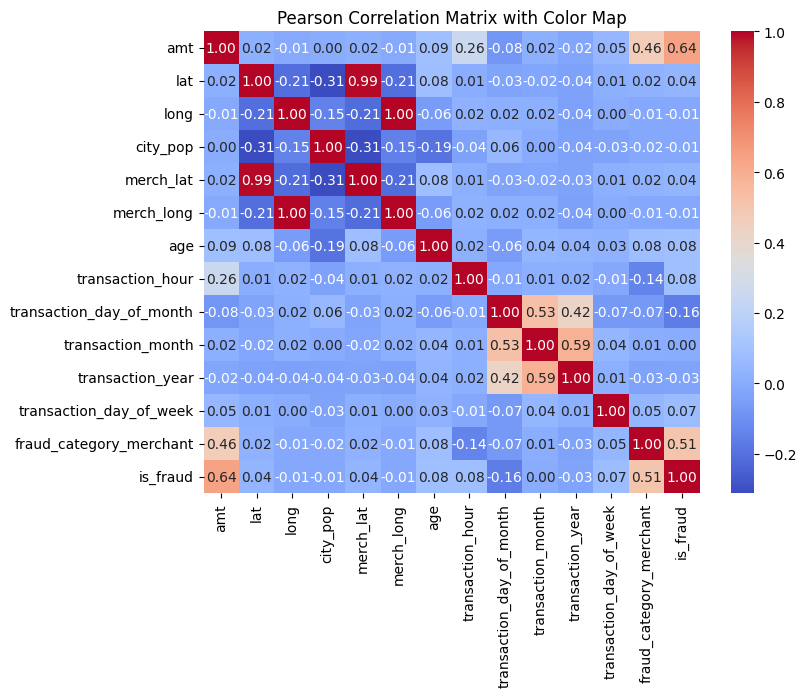

In [24]:
# Select numerical columns from df_train_balanceado
numerical_cols = df_train_balanceado.select_dtypes(include=['number'])

# Calculate the Pearson correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap with a color map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix with Color Map')
plt.show()

In [25]:
# Obtener las columnas numéricas de X_train_sin_atipico
columnas_numericas = X_train_sin_atipico.select_dtypes(include=['number']).columns

# Imprimir las columnas numéricas
columnas_numericas

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age',
       'transaction_hour', 'transaction_day_of_month', 'transaction_month',
       'transaction_year', 'transaction_day_of_week',
       'fraud_category_merchant'],
      dtype='object')

In [26]:
# Obtener las columnas categóricas  X_train_sin_atipico
columnas_categoricas = X_train_sin_atipico.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas
columnas_categoricas

Index(['category', 'city', 'state', 'profession_group'], dtype='object')

In [27]:
# Inicializa LabelEncoder
encoder = LabelEncoder()

# Ajusta y transforma la columna 'category'
X_train['category'] = encoder.fit_transform(X_train['category'])

# Ajusta y transforma la columna 'city'
X_train['city'] = encoder.fit_transform(X_train['city'])

# Ajusta y transforma la columna 'state'
X_train['state'] = encoder.fit_transform(X_train['state'])

# Ajusta y transforma la columna 'profession_group'
X_train['profession_group'] = encoder.fit_transform(X_train['profession_group'])

In [28]:
# Transforma la columna 'category' en X_test
X_test['category'] = encoder.fit_transform(X_test['category'])

# Transforma la columna 'city' en X_test
X_test['city'] = encoder.fit_transform(X_test['city'])

# Transforma la columna 'state' en X_test
X_test['state'] = encoder.fit_transform(X_test['state'])

# Transforma la columna 'profession_group'
X_test['profession_group'] = encoder.fit_transform(X_test['profession_group'])

**Variables seleccionadas**

'category', 'amt', 'city', 'state', 'age',
    'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
    'profession_group', 'fraud_category_merchant'

In [29]:
#escoge las columnas definitivas para el train
X_train_filtro = X_train[['category', 'amt', 'city', 'state', 'age',
                                                  'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
                                                  'profession_group', 'fraud_category_merchant']]

In [30]:
# escoge las columnas definitivas para el test
X_test_filtro = X_test[['category', 'amt', 'city', 'state', 'age',
                        'transaction_hour', 'transaction_day_of_month', 'transaction_day_of_week',
                        'profession_group', 'fraud_category_merchant']]


#Reducción de dimensionalidad

In [31]:
# Reduce el conjunto de datos a 2D usando t-SNE
# Estos sets de datos se utilizaran mas adelante para realizar la grafica de frontera de desicion
tsne = TSNE(n_components=2, random_state=114)
X_train_tsne = tsne.fit_transform(X_train_filtro)
X_test_tsne = tsne.fit_transform(X_test_filtro)

# Desicion Tree

##Modelado

In [32]:
modelDT = DecisionTreeClassifier(random_state=114)

In [33]:
# Espacio de hiperparámetros
paramsDT = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

In [34]:
# Configuracion de RandomizedSearchCV
searchDT = RandomizedSearchCV(
    estimator=modelDT,
    param_distributions=paramsDT,
    n_iter=100,  # Número de combinaciones a probar
    scoring='roc_auc',  # Métrica de evaluación
    cv=5,  # Número de validaciones cruzadas
    verbose=1,  # Imprime el progreso
    random_state=144,
    n_jobs=-1  # Usa todos los núcleos disponibles
)

# Ejecuta la búsqueda en el conjunto de entrenamiento
searchDT.fit(X_train_filtro, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", searchDT.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}


In [35]:
#Selecciona el mejor modelo
best_modelDT = searchDT.best_estimator_

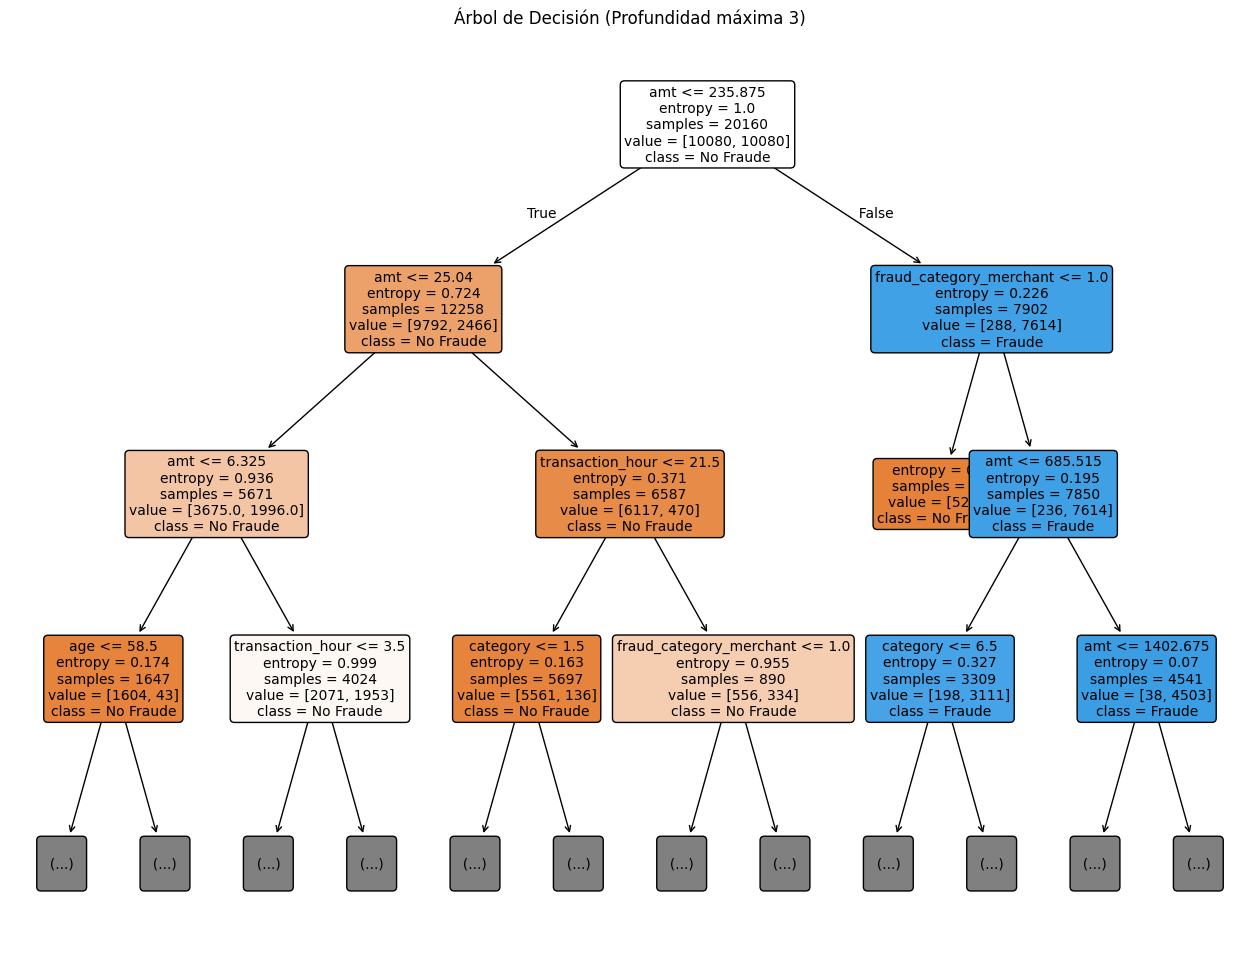

In [36]:
# Configurar el tamaño de la figura (ancho, alto)
plt.figure(figsize=(16, 12))  # Aumenta el ancho y alto de la figura

plot_tree(
    best_modelDT,
    feature_names=X_train_filtro.columns,  # Nombres de las características
    class_names=['No Fraude', 'Fraude'],  # Etiquetas de las clases
    rounded=True,  # Bordes redondeados
    filled=True,  #relleno
    fontsize=10,   # Tamaño de la fuente
    max_depth=3    # Profundidad del árbol
)
plt.title("Árbol de Decisión (Profundidad máxima 3)")  # Título del gráfico
plt.show()

##Explicabilidad

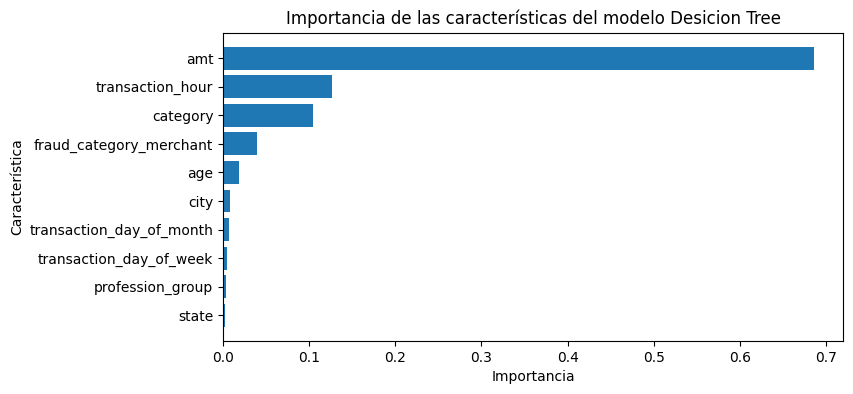

In [37]:
# Obtener la importancia de las características
feature_importancesDT = best_modelDT.feature_importances_

# Obtener los nombres de las características
feature_names = X_train_filtro.columns

# Crear un DataFrame para facilitar la visualización
importanceDT = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importancesDT})

# Ordenar por importancia
importanceDT = importanceDT.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.barh(importanceDT['Feature'], importanceDT['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características del modelo Desicion Tree')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


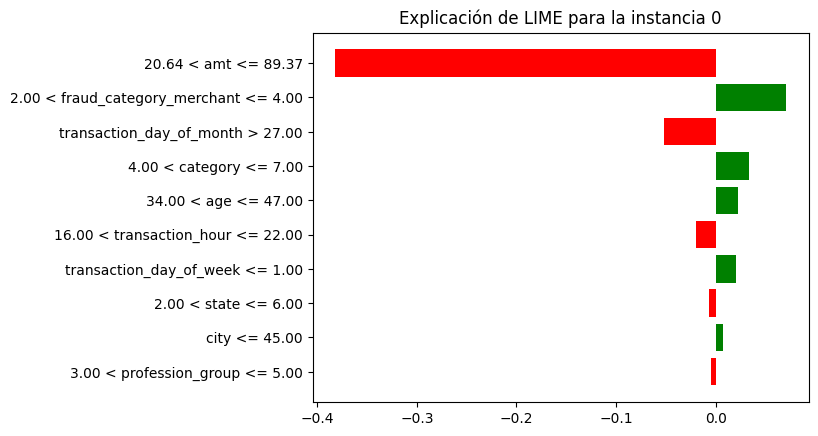

In [38]:
# Crear el explicador de LIME
explainerDT = LimeTabularExplainer(
    training_data=X_train_filtro.values,  # Datos de entrenamiento
    feature_names=X_train_filtro.columns.tolist(),  # Nombres de las características
    class_names=['No Fraude', 'Fraude'],  # Nombres de clases
    mode='classification'
)

# Elegir una instancia para explicar
instance_index = 0  # Se selecciona la primera muestra
instance = X_test_filtro.iloc[instance_index].values.reshape(1, -1)  # 2D

# Función de predicción que LIME usará
def predict_fnDT(X):
    return best_modelDT.predict_proba(X)

# Generar las explicaciones
try:
    expDT = explainerDT.explain_instance(
        data_row=instance[0], #Primer registro
        predict_fn=predict_fnDT,  # función de predicción definida
        num_features=10  # Número de características a mostrar
    )

    # Mostrar la explicación
    expDT.show_in_notebook(show_table=True, show_all=False)

    # Mostrar la explicación como gráfico
    fig = expDT.as_pyplot_figure()
    plt.title(f'Explicación de LIME para la instancia {instance_index}')
    plt.show()

except Exception as e:
    print("Error al generar la explicación:", str(e))

##Evaluacion

In [39]:
# Evalúa el modelo optimizado en el conjunto de prueba
y_predDT = best_modelDT.predict(X_test_filtro)

In [61]:
# Calcula métricas
accuracyDT = accuracy_score(y_test, y_predDT)
precisionDT = precision_score(y_test, y_predDT)
recallDT = recall_score(y_test, y_predDT)
f1DT = f1_score(y_test, y_predDT)
conf_matrixDT = confusion_matrix(y_test, y_predDT)

# Especificidad
TN_DT = conf_matrixDT[0, 0]  # Verdaderos Negativos
FP_DT = conf_matrixDT[0, 1]  # Falsos Positivos
specificityDT = TN_DT / (TN_DT + FP_DT)

# Imprime las métricas
print(f'Accuracy: {accuracyDT:.3f}')
print(f'Precisión (Precision): {precisionDT:.3f}')
print(f'Sensibilidad (Recall): {recallDT:.3f}')
print(f'F1 Score: {f1DT:.3f}')
print(f'Especificidad: {specificityDT:.3f}')

# Mostrar el reporte de clasificación
reportDT = classification_report(y_test, y_predDT)
print("Reporte de Clasificación:")
print(reportDT)

Accuracy: 0.977
Precisión (Precision): 0.868
Sensibilidad (Recall): 0.961
F1 Score: 0.912
Especificidad: 0.979
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2521
           1       0.87      0.96      0.91       356

    accuracy                           0.98      2877
   macro avg       0.93      0.97      0.95      2877
weighted avg       0.98      0.98      0.98      2877



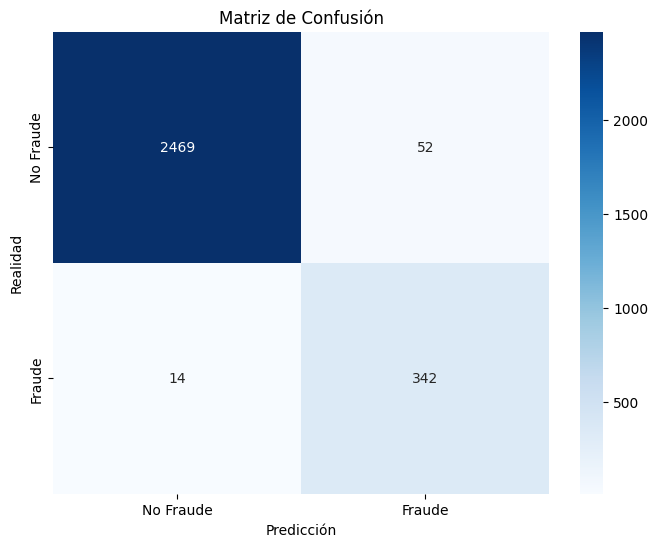

In [41]:
# Calcula la matriz de confusión
conf_matrixDT = confusion_matrix(y_test, y_predDT)

# Crea un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixDT, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraude', 'Fraude'],
            yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

0.9700237109404597


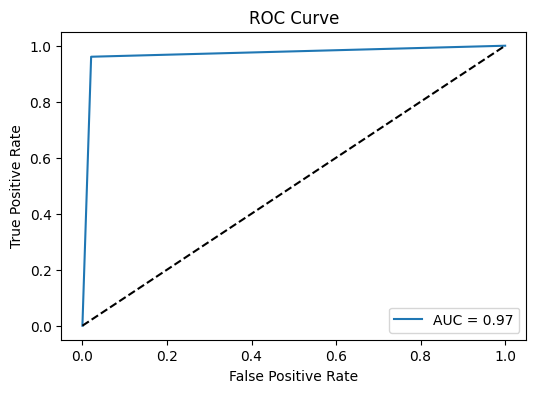

In [42]:
# AUC y Curva ROC
aucDT = roc_auc_score(y_test, y_predDT)
print(aucDT)

fprDT, tprDT, thresholdsDT = roc_curve(y_test, y_predDT)

plt.figure(figsize=(6, 4))
plt.plot(fprDT, tprDT, label=f"AUC = {aucDT:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

##Visualización de Clases y Frontera de Decisión.

In [44]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneDT = best_modelDT.predict(X_test_filtro)

# Crear un DataFrame para facilitar la visualización
trainDT = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
trainDT['is_fraud'] = y_train  # Agregar la columna is_fraud al DataFrame de entrenamiento

testDT = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
testDT['Predicted'] = y_pred_tsneDT  # Agregar las predicciones al DataFrame de prueba

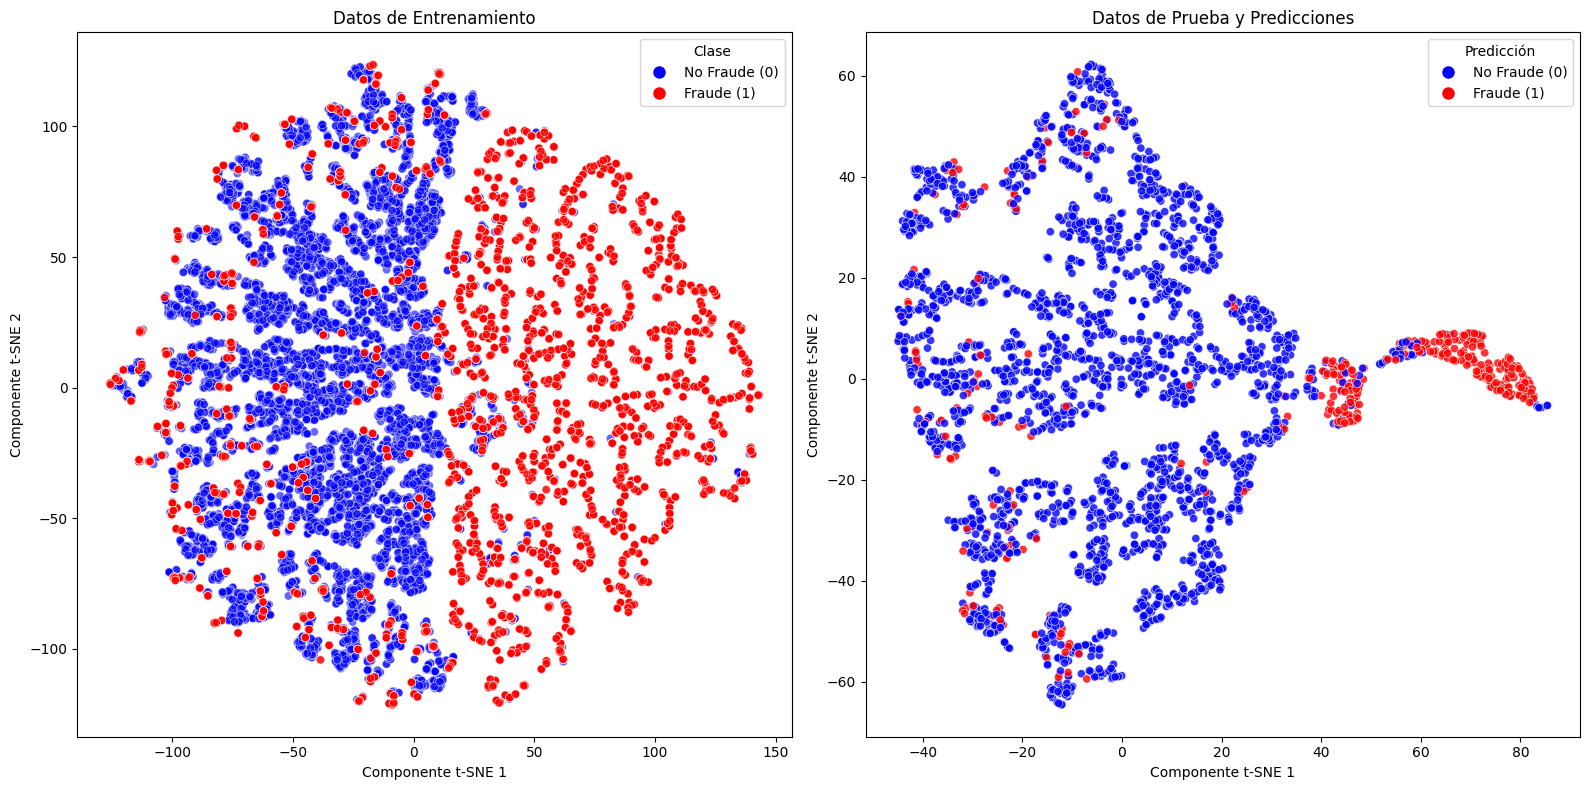

In [45]:
# Configuración de los gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Graficar datos de entrenamiento
sns.scatterplot(x='Component 1', y='Component 2', hue='is_fraud',
                palette=['blue', 'red'], alpha=0.6, data=trainDT, ax=axs[0],
                legend=False)  # Desactiva la leyenda automática
axs[0].set_title('Datos de Entrenamiento')
axs[0].set_xlabel('Componente t-SNE 1')
axs[0].set_ylabel('Componente t-SNE 2')

# Agregar la leyenda manualmente para el gráfico de entrenamiento
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
axs[0].legend(handles=handles, title='Clase', loc='upper right')

# Graficar datos de prueba
sns.scatterplot(x='Component 1', y='Component 2', hue='Predicted',
                palette=['blue', 'red'], alpha=0.8, data=testDT, marker='o', ax=axs[1],
                legend=False)  # Desactiva la leyenda automática
axs[1].set_title('Datos de Prueba y Predicciones')
axs[1].set_xlabel('Componente t-SNE 1')
axs[1].set_ylabel('Componente t-SNE 2')

# Agregar la leyenda manualmente para el gráfico de prueba
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
axs[1].legend(handles=handles, title='Predicción', loc='upper right')

plt.tight_layout()
plt.show()

# Random Forest

## Modelado

In [46]:
modelRF = RandomForestClassifier(random_state=114)

In [47]:
#Espacio de hipeparametros
paramsRF = {
    'n_estimators': [50, 75, 100, 125, 150, 200],# Número de árboles
    'max_features': ['sqrt', 'log2', None],# Número de características a considerar en cada división
    'max_depth':  randint(1, 20),# Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

In [48]:
# Configura RandomizedSearchCV
searchRF = RandomizedSearchCV(
            modelRF, param_distributions=paramsRF,
            n_iter=100, cv=5, scoring='roc_auc',
            verbose=1, random_state=114, n_jobs=-1)

# Entrena el modelo
searchRF.fit(X_train_filtro, y_train)

# Mejores hiperparámetros
print("Mejores hiperparámetros:", searchRF.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}


In [49]:
# Selecciona el mejor modelo
best_modelRF = searchRF.best_estimator_

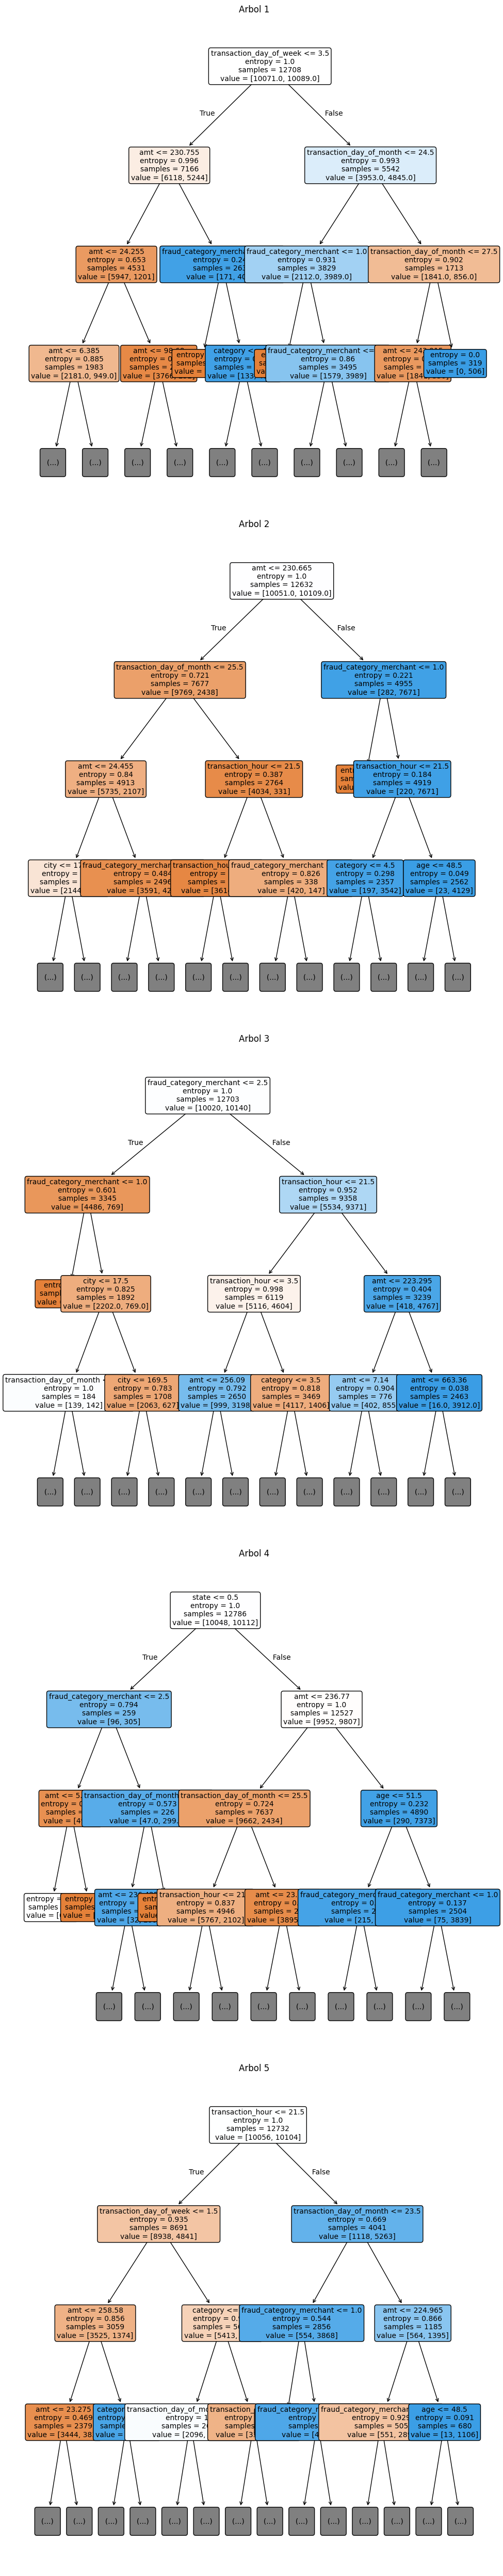

In [50]:
# Número de árboles a visualizar
n_trees_to_plot = 5

# Figura para los gráficos
fig, axes = plt.subplots(n_trees_to_plot, 1, figsize=(10, 10 * n_trees_to_plot))

# Iterar los n_trees_to_plot árboles y mostrarlos
for i in range(n_trees_to_plot):
    # Obtener el árbol correspondiente del modelo
    tree = best_modelRF.estimators_[i]

    # Graficar el árbol con una profundidad máxima de 3
    plot_tree(tree,
              feature_names=X_train_filtro.columns,
              filled=True,
              ax=axes[i],
              rounded=True,
              fontsize=10,
              max_depth=3)
    axes[i].set_title(f'Arbol {i + 1}')

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()


##Explicabilidad

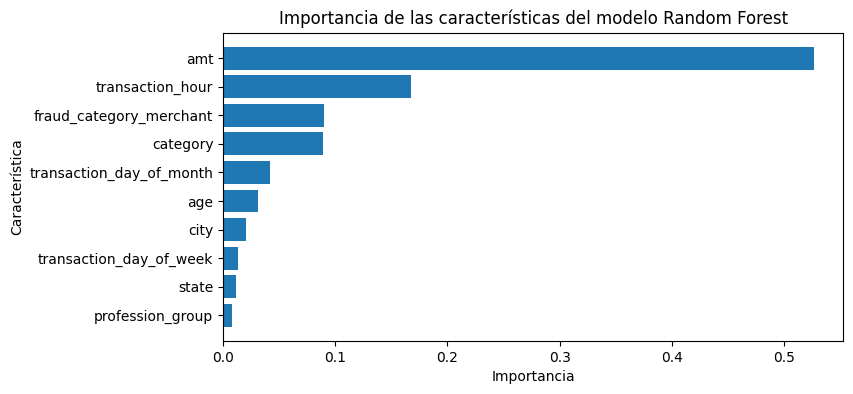

In [51]:
# Obtener la importancia de las características
feature_importancesRF = best_modelRF.feature_importances_

# Obtener los nombres de las características
feature_names = X_train_filtro.columns

# Crear un DataFrame para facilitar la visualización
importanceRF = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importancesRF})

# Ordenar por importancia
importanceRF = importanceRF.sort_values(by='Importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.barh(importanceRF['Feature'], importanceRF['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características del modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


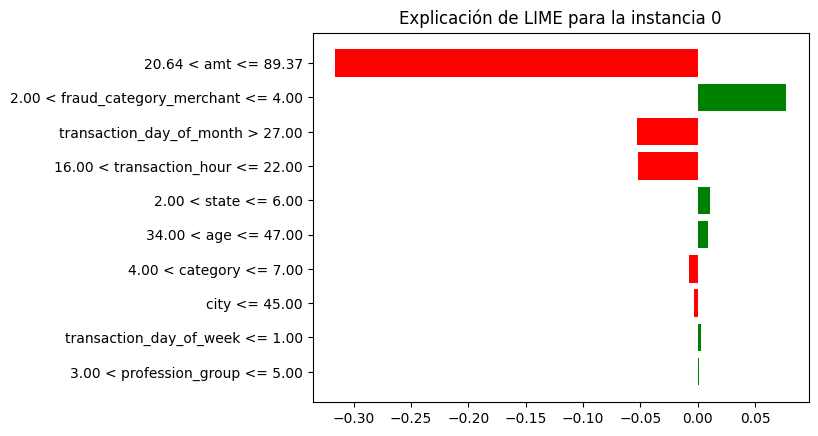

In [53]:
# Crear el explicador de LIME
explainer_rf = LimeTabularExplainer(
    training_data=X_train_filtro.values,  # Datos de entrenamiento
    feature_names=X_train_filtro.columns.tolist(),  # Nombres de las características
    class_names=['No Fraude', 'Fraude'],  # Nombres de clases
    mode='classification'
)

# Elegir una instancia para explicar
instance_index = 0  # Se utiliza la primera instancia del set de datos
instance = X_test_filtro.iloc[instance_index].values.reshape(1, -1)  # 2D

# Función de predicción(Random Forest) que LIME usará
def predict_fn_rf(X):
    return best_modelRF.predict_proba(X)

# Generar las explicaciones
try:
    exp_rf = explainer_rf.explain_instance(
        data_row=instance[0],
        predict_fn=predict_fn_rf,  # función de predicción definida
        num_features=10  # Número de características a mostrar
    )

    # Mostrar la explicación
    exp_rf.show_in_notebook(show_table=True, show_all=False)

    # Mostrar la explicación como gráfico
    fig = exp_rf.as_pyplot_figure()
    plt.title(f'Explicación de LIME para la instancia {instance_index}')
    plt.show()

except Exception as e:
    print("Error al generar la explicación:", str(e))

##Evaluación

In [54]:
#obtener predicciones sobre el conjunto de pruebas
y_predRF = best_modelRF.predict(X_test_filtro)

In [56]:
# Calcula métricas
accuracyRF = accuracy_score(y_test, y_predRF)
precisionRF = precision_score(y_test, y_predRF)
recallRF = recall_score(y_test, y_predRF)
f1RF = f1_score(y_test, y_predRF)
conf_matrixRF = confusion_matrix(y_test, y_predRF)

# Especificidad
TN_RF = conf_matrixRF[0, 0]  # Verdaderos Negativos
FP_RF = conf_matrixRF[0, 1]  # Falsos Positivos
specificityRF = TN_RF / (TN_RF + FP_RF)

print(f'Accuracy: {accuracyRF:.3f}')
print(f'Precisión (Precision): {precisionRF:.3f}')
print(f'Sensibilidad (Recall): {recallRF:.3f}')
print(f'F1 Score: {f1RF:.3f}')
print(f'Especificidad: {specificityRF:.3f}')


# Mostrar el reporte de clasificación
reportRF = classification_report(y_test, y_predRF)
print("Reporte de Clasificación:")
print(reportRF)

Accuracy: 0.988
Precisión (Precision): 0.955
Sensibilidad (Recall): 0.947
F1 Score: 0.951
Especificidad: 0.994
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2521
           1       0.95      0.95      0.95       356

    accuracy                           0.99      2877
   macro avg       0.97      0.97      0.97      2877
weighted avg       0.99      0.99      0.99      2877



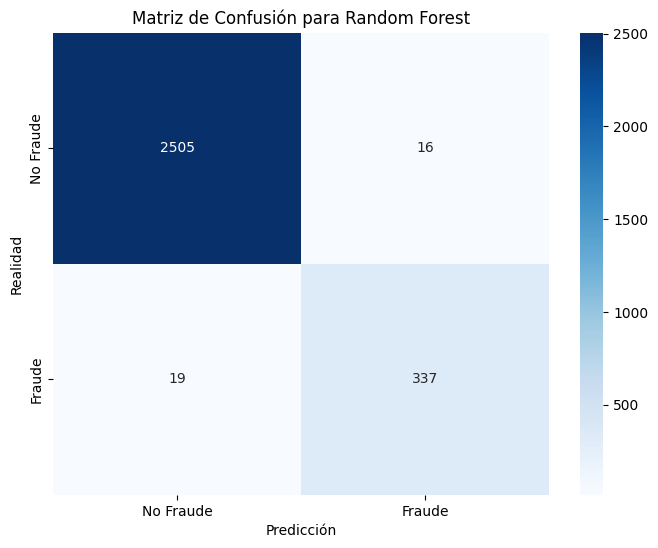

In [57]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixRF, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraude', 'Fraude'],
            yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión para Random Forest')
plt.show()

0.9701412628304266


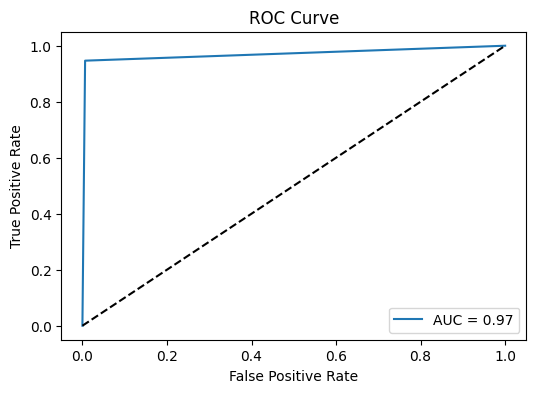

In [58]:
# AUC y Curva ROC
aucRF = roc_auc_score(y_test, y_predRF)
fprRF, tprRF, thresholdsRF = roc_curve(y_test, y_predRF)

print(aucRF)

plt.figure(figsize=(6, 4))
plt.plot(fprRF, tprRF, label=f"AUC = {aucRF:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

##Visualización de Clases y Frontera de Decisión.

In [59]:
# Predicciones en los datos de prueba utilizando el modelo ya entrenado
y_pred_tsneRF = best_modelRF.predict(X_test_filtro)

# Crear un DataFrame para facilitar la visualización
train_RF = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
train_RF['is_fraud'] = y_train  # Agregar la columna is_fraud al DataFrame de entrenamiento

test_RF = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
test_RF['Predicted'] = y_pred_tsneRF  # Agregar las predicciones al DataFrame de prueba

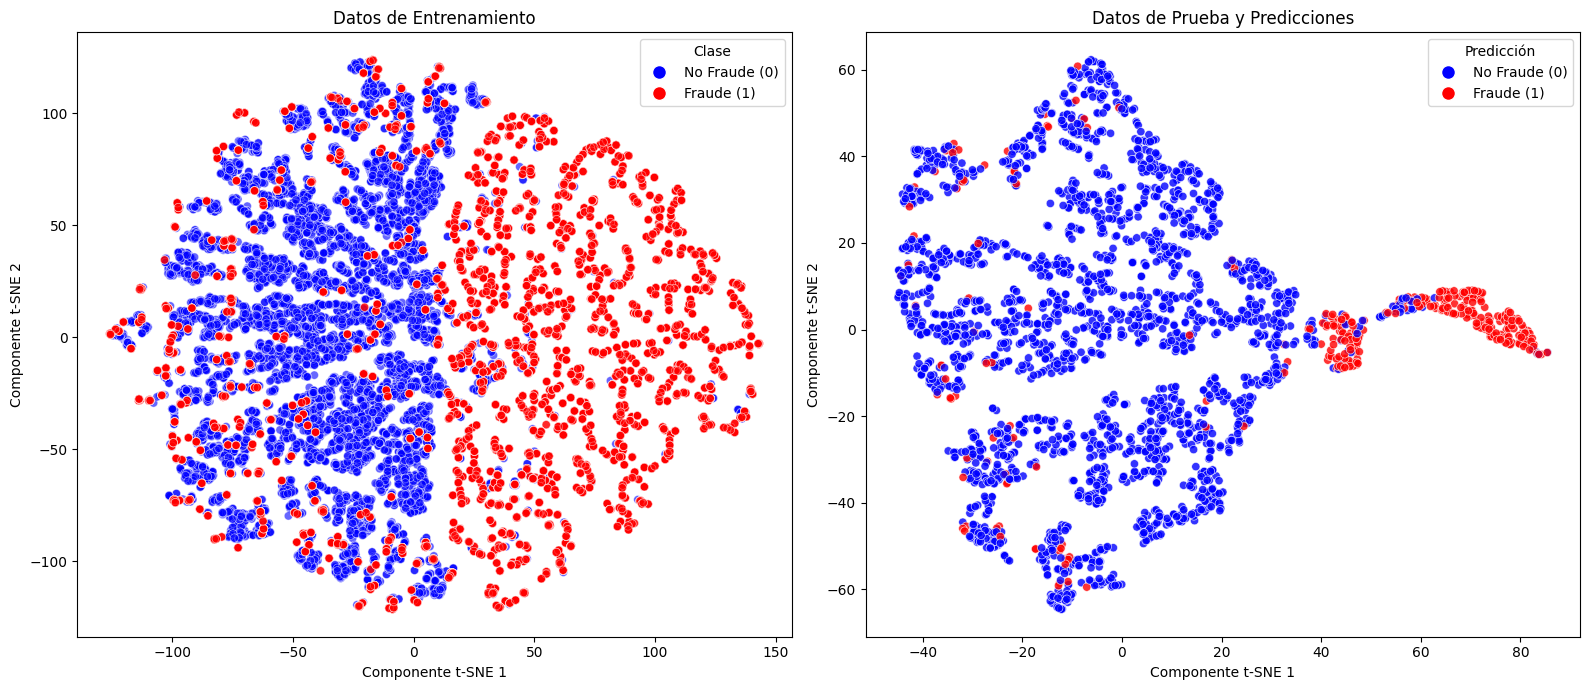

In [60]:
# Configuración de los gráficos
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Graficar datos de entrenamiento
sns.scatterplot(x='Component 1', y='Component 2', hue='is_fraud',
                palette=['blue', 'red'], alpha=0.6, data=train_RF, ax=axs[0],
                legend=False)  # Desactiva la leyenda automática
axs[0].set_title('Datos de Entrenamiento')
axs[0].set_xlabel('Componente t-SNE 1')
axs[0].set_ylabel('Componente t-SNE 2')

# Agregar la leyenda manualmente para el gráfico de entrenamiento
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
axs[0].legend(handles=handles, title='Clase', loc='upper right')

# Graficar datos de prueba
sns.scatterplot(x='Component 1', y='Component 2', hue='Predicted',
                palette=['blue', 'red'], alpha=0.8, data=test_RF, marker='o', ax=axs[1],
                legend=False)  # Desactiva la leyenda automática
axs[1].set_title('Datos de Prueba y Predicciones')
axs[1].set_xlabel('Componente t-SNE 1')
axs[1].set_ylabel('Componente t-SNE 2')

# Agregar la leyenda manualmente para el gráfico de prueba
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraude (0)'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraude (1)')]
axs[1].legend(handles=handles, title='Predicción', loc='upper right')

plt.tight_layout()
plt.show()